<a href="https://colab.research.google.com/github/TIANBOQIU/AppliedDeepLearning/blob/master/TEST_textClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import division, absolute_import, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.13.0-rc0


In [0]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [0]:
word_index = imdb.get_word_index()


In [0]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = {v:k for k,v in word_index.items()}

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value = word_index["<PAD>"], padding = 'post', maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value = word_index["<PAD>"], padding = 'post', maxlen=256)

In [32]:
## Build the Model
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [0]:
# for tuning (validation set from training set) 
x_val = train_data[:10000]
partial_x_train = train_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [36]:
history = model.fit(partial_x_train, partial_y_train, epochs=40, batch_size=512,validation_data=(x_val,y_val),verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 1s 89us/sample - loss: 0.6915 - acc: 0.6114 - val_loss: 0.6889 - val_acc: 0.6952
Epoch 2/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.6845 - acc: 0.7090 - val_loss: 0.6794 - val_acc: 0.7302
Epoch 3/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.6697 - acc: 0.7369 - val_loss: 0.6609 - val_acc: 0.7422
Epoch 4/40
15000/15000 [==============================] - 1s 51us/sample - loss: 0.6447 - acc: 0.7630 - val_loss: 0.6328 - val_acc: 0.7468
Epoch 5/40
15000/15000 [==============================] - 1s 53us/sample - loss: 0.6095 - acc: 0.7891 - val_loss: 0.5965 - val_acc: 0.7864
Epoch 6/40
15000/15000 [==============================] - 1s 52us/sample - loss: 0.5663 - acc: 0.8166 - val_loss: 0.5552 - val_acc: 0.8148
Epoch 7/40
15000/15000 [==============================] - 1s 52us/sa

In [37]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 36us/sample - loss: 0.3373 - acc: 0.8708
[0.33728807629585267, 0.87084]


In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

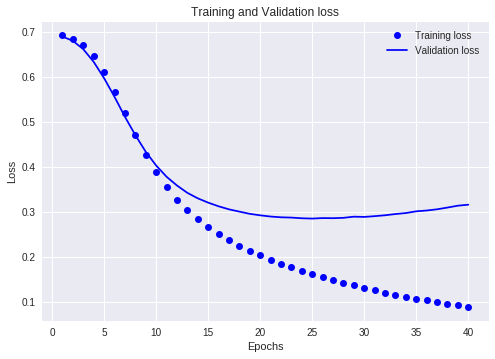

In [39]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss'] 

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

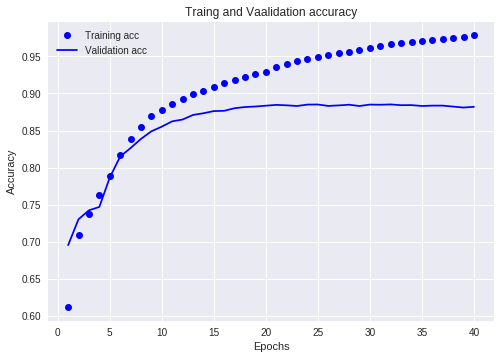

In [40]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traing and Vaalidation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()